In [2]:
!pip install pixellib

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 430 kB 4.2 MB/s 
     |████████████████████████████████| 8.3 MB 72.0 MB/s 
     |████████████████████████████████| 151 kB 74.2 MB/s 
     |████████████████████████████████| 79 kB 8.0 MB/s 
     |████████████████████████████████| 1.4 MB 65.3 MB/s 
     |████████████████████████████████| 50 kB 6.1 MB/s 
     |████████████████████████████████| 843 kB 84.6 MB/s 
     |████████████████████████████████| 96 kB 6.3 MB/s 
     |████████████████████████████████| 596 kB 65.7 MB/s 
     |████████████████████████████████| 117 kB 89.7 MB/s 
     |████████████████████████████████| 81 kB 9.9 MB/s 
     |████████████████████████████████| 87 kB 7.0 MB/s 
     |████████████████████████████████| 97 kB 7.8 MB/s 
     |████████████████████████████████| 3.1 MB 53.9 MB/s 
     |████████████████████████████████| 60.9 MB 5.6 MB/s 
     |████████████████████████████████| 338 

In [12]:
!pip install pillow==4.1.1
%reload_ext autoreload
%autoreload

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 11.3 MB 11.0 MB/s 
     |████████████████████████████████| 112 kB 74.3 MB/s 
  Created wheel for pillow: filename=Pillow-4.1.1-cp37-cp37m-linux_x86_64.whl size=1009699 sha256=9071b77770d9ee5c15d4a973062fd74651c8fe789721a4b662d72bcf4d9c46d3
  Stored in directory: /root/.cache/pip/wheels/51/53/67/d76ff9fd54dd89a25efce20d2e7c9b35348db386b53deb8095
  Created wheel for olefile: filename=olefile-0.46-py2.py3-none-any.whl size=35432 sha256=2aa745db6d71b12652ac5a4040ca7d7f2c5f5504d02efaa02f76243423e3d3d6
  Stored in directory: /root/.cache/pip/wheels/84/53/e6/37d90ccb3ad1a3ca98d2b17107e9fda401a7c541ea1eb6a65a
Successfully built pillow olefile
  Attempting uninstall: pillow
    Found existing installation: Pillow 9.1.1
    Uninstalling Pillow-9.1.1:
      Successfully uninstalled Pillow-9.1.1
ERROR: pip's dependency resolver does not currently take into acco

# 10. 인물사진 만들어 보자

In [7]:
import os
import urllib
import cv2
import numpy as np
from pixellib.semantic import semantic_segmentation
from matplotlib import pyplot as plt
from PIL import Image

(2448, 3264, 3)


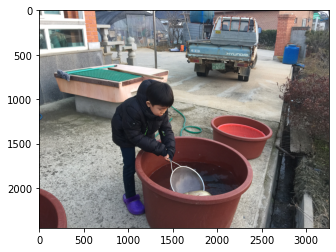

In [2]:
img_path = '/content/drive/MyDrive/AIFFEL/EXP/data/photo/photo01.JPG'  
img_orig = cv2.imread(img_path) 

print(img_orig.shape)
plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

In [3]:
# 저장할 파일 이름을 결정합니다
model_dir = '/content/drive/MyDrive/AIFFEL/EXP/data/photo'
model_file = os.path.join(model_dir, '/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5')

# PixelLib가 제공하는 모델의 url입니다
model_url = 'https://github.com/ayoolaolafenwa/PixelLib/releases/download/1.1/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5'

# 다운로드를 시작합니다
urllib.request.urlretrieve(model_url, model_file)

('/deeplabv3_xception_tf_dim_ordering_tf_kernels.h5',
 <http.client.HTTPMessage at 0x7f3810095910>)

In [4]:
model = semantic_segmentation()
model.load_pascalvoc_model(model_file)

In [5]:
segvalues, output = model.segmentAsPascalvoc(img_path)

In [91]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]
len(LABEL_NAMES)

21

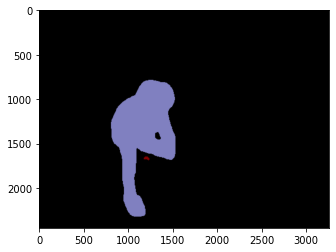

In [92]:
plt.imshow(output)
plt.show()

In [93]:
segvalues

{'class_ids': array([ 0,  4, 15]),
 'masks': array([[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]])}

In [94]:
for class_id in segvalues['class_ids']:
    print(LABEL_NAMES[class_id])

background
boat
person


여기에서 차로 인식을 하기도 했는데 배로 인식하네요

In [10]:
# 아래 코드를 이해하지 않아도 좋습니다
# PixelLib에서 그대로 가져온 코드입니다
# 주목해야 할 것은 생상 코드 결과물이예요!
colormap = np.zeros((256, 3), dtype = int)
ind = np.arange(256, dtype=int)

for shift in reversed(range(8)):
    for channel in range(3):
        colormap[:, channel] |= ((ind >> channel) & 1) << shift
    ind >>= 3

colormap[:20]

array([[  0,   0,   0],
       [128,   0,   0],
       [  0, 128,   0],
       [128, 128,   0],
       [  0,   0, 128],
       [128,   0, 128],
       [  0, 128, 128],
       [128, 128, 128],
       [ 64,   0,   0],
       [192,   0,   0],
       [ 64, 128,   0],
       [192, 128,   0],
       [ 64,   0, 128],
       [192,   0, 128],
       [ 64, 128, 128],
       [192, 128, 128],
       [  0,  64,   0],
       [128,  64,   0],
       [  0, 192,   0],
       [128, 192,   0]])

In [11]:
colormap[15]

array([192, 128, 128])

In [12]:
seg_color = (128,128,192)

(2448, 3264)


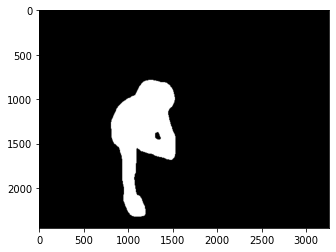

In [13]:
# output의 픽셀 별로 색상이 seg_color와 같다면 1(True), 다르다면 0(False)이 됩니다
seg_map = np.all(output==seg_color, axis=-1)
print(seg_map.shape)
plt.imshow(seg_map, cmap='gray')
plt.show()

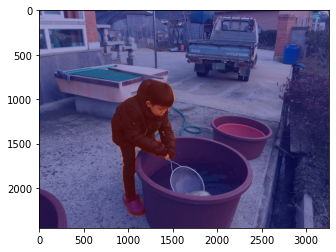

In [14]:
img_show = img_orig.copy()

# True과 False인 값을 각각 255과 0으로 바꿔줍니다
img_mask = seg_map.astype(np.uint8) * 255

# 255와 0을 적당한 색상으로 바꿔봅니다
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)

# 원본 이미지와 마스트를 적당히 합쳐봅니다
# 0.6과 0.4는 두 이미지를 섞는 비율입니다.
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.4, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

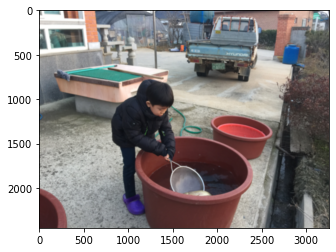

In [15]:
# (13,13)은 blurring kernel size를 뜻합니다
# 다양하게 바꿔보세요
img_orig_blur = cv2.blur(img_orig, (13,13))  
plt.imshow(cv2.cvtColor(img_orig_blur, cv2.COLOR_BGR2RGB))
plt.show()

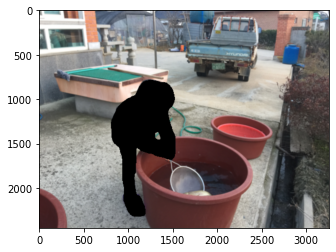

In [16]:
img_mask_color = cv2.cvtColor(img_mask, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg_blur = cv2.bitwise_and(img_orig_blur, img_bg_mask)
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

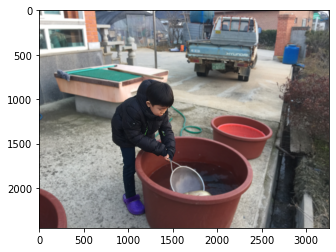

In [17]:
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

(1280, 960, 3)


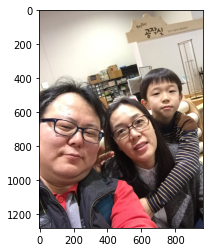

In [18]:
img_path02 = '/content/drive/MyDrive/AIFFEL/EXP/data/photo/photo05.JPG'
img_orig02 = cv2.imread(img_path02) 
print (img_orig02.shape)

plt.imshow(cv2.cvtColor(img_orig02, cv2.COLOR_BGR2RGB))
plt.show()

# 10. 인물사진을 만들어 보자

In [68]:
import cv2
import numpy as np
import os
from glob import glob
from os.path import join
import tarfile
import urllib

from matplotlib import pyplot as plt
import tensorflow as tf

(3264, 2448, 3)


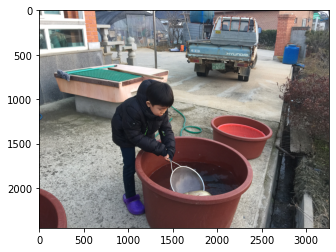

In [69]:
img_path01 = '/content/drive/MyDrive/AIFFEL/EXP/data/photo/photo02.JPG'
img_orig01 = cv2.imread(img_path01) 
print (img_orig01.shape)

plt.imshow(cv2.cvtColor(img_orig, cv2.COLOR_BGR2RGB))
plt.show()

(1280, 960, 3)


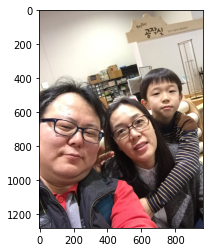

In [21]:
img_path02 = '/content/drive/MyDrive/AIFFEL/EXP/data/photo/photo05.JPG'
img_orig02 = cv2.imread(img_path02) 
print (img_orig02.shape)

plt.imshow(cv2.cvtColor(img_orig02, cv2.COLOR_BGR2RGB))
plt.show()

# 배경 이미지

(450, 720, 3)


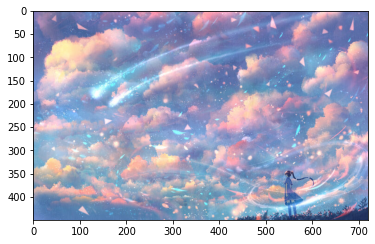

In [22]:
background_img_path01 = '/content/drive/MyDrive/AIFFEL/EXP/data/photo/background01.jpg'
background_img_orig01 = cv2.imread(background_img_path01) 
print (background_img_orig01.shape)

plt.imshow(cv2.cvtColor(background_img_orig01, cv2.COLOR_BGR2RGB))
plt.show()

(1080, 1920, 3)


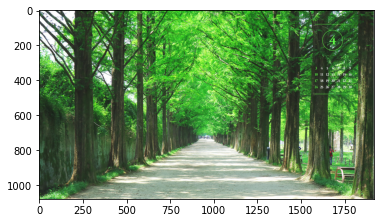

In [23]:
background_img_path02 = '/content/drive/MyDrive/AIFFEL/EXP/data/photo/background02.png'
background_img_orig02 = cv2.imread(background_img_path02) 
print (background_img_orig02.shape)

plt.imshow(cv2.cvtColor(background_img_orig02, cv2.COLOR_BGR2RGB))
plt.show()

# Model

In [24]:
class DeepLabModel(object):
    INPUT_TENSOR_NAME = 'ImageTensor:0'
    OUTPUT_TENSOR_NAME = 'SemanticPredictions:0'
    INPUT_SIZE = 513
    FROZEN_GRAPH_NAME = 'frozen_inference_graph'

    # __init__()에서 모델 구조를 직접 구현하는 대신, tar file에서 읽어들인 그래프구조 graph_def를 
    # tf.compat.v1.import_graph_def를 통해 불러들여 활용하게 됩니다. 
    def __init__(self, tarball_path):
        self.graph = tf.Graph()
        graph_def = None
        tar_file = tarfile.open(tarball_path)
        for tar_info in tar_file.getmembers():
            if self.FROZEN_GRAPH_NAME in os.path.basename(tar_info.name):
                file_handle = tar_file.extractfile(tar_info)
                graph_def = tf.compat.v1.GraphDef.FromString(file_handle.read())
                break
        tar_file.close()

        with self.graph.as_default():
    	    tf.compat.v1.import_graph_def(graph_def, name='')

        self.sess = tf.compat.v1.Session(graph=self.graph)

    # 이미지를 전처리하여 Tensorflow 입력으로 사용 가능한 shape의 Numpy Array로 변환합니다.
    def preprocess(self, img_orig):
        height, width = img_orig.shape[:2]
        resize_ratio = 1.0 * self.INPUT_SIZE / max(width, height)
        target_size = (int(resize_ratio * width), int(resize_ratio * height))
        resized_image = cv2.resize(img_orig, target_size)
        resized_rgb = cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB)
        img_input = resized_rgb
        return img_input
        
    def run(self, image):
        img_input = self.preprocess(image)

        # Tensorflow V1에서는 model(input) 방식이 아니라 sess.run(feed_dict={input...}) 방식을 활용합니다.
        batch_seg_map = self.sess.run(
            self.OUTPUT_TENSOR_NAME,
            feed_dict={self.INPUT_TENSOR_NAME: [img_input]})

        seg_map = batch_seg_map[0]
        return cv2.cvtColor(img_input, cv2.COLOR_RGB2BGR), seg_map

In [25]:
# define model and download & load pretrained weight
_DOWNLOAD_URL_PREFIX = 'http://download.tensorflow.org/models/'

model_dir = '/content/drive/MyDrive/AIFFEL/EXP/data/photo/'
tf.io.gfile.makedirs(model_dir)

print ('temp directory:', model_dir)

download_path = os.path.join(model_dir, 'deeplab_model.tar.gz')
if not os.path.exists(download_path):
    urllib.request.urlretrieve(_DOWNLOAD_URL_PREFIX + 'deeplabv3_mnv2_pascal_train_aug_2018_01_29.tar.gz',
                   download_path)

MODEL = DeepLabModel(download_path)
print('model loaded successfully!')

temp directory: /content/drive/MyDrive/AIFFEL/EXP/data/photo/
model loaded successfully!


In [26]:
LABEL_NAMES = [
    'background', 'aeroplane', 'bicycle', 'bird', 'boat', 'bottle', 'bus',
    'car', 'cat', 'chair', 'cow', 'diningtable', 'dog', 'horse', 'motorbike',
    'person', 'pottedplant', 'sheep', 'sofa', 'train', 'tv'
]

In [117]:
img_resized01, seg_map01 = MODEL.run(img_orig)
print (img_orig.shape, img_resized01.shape, seg_map01.max())

(2448, 3264, 3) (384, 513, 3) 16


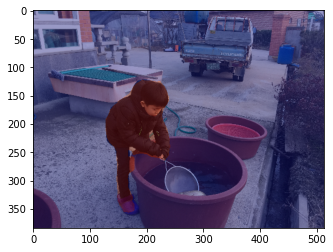

In [118]:
img_show = img_resized01.copy()
seg_map01 = np.where(seg_map01 == 15, 15, 0) # 예측 중 사람만 추출
img_mask = seg_map01 * (255/seg_map01.max()) # 255 normalization
img_mask = img_mask.astype(np.uint8)
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.35, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

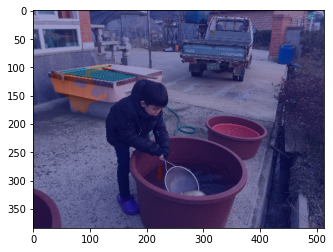

In [114]:
img_show = img_resized01.copy()
seg_map01 = np.where(seg_map01 == 4, 4, 0) # 예측 중 사람만 추출
img_mask = seg_map01 * (255/seg_map01.max()) # 255 normalization
img_mask = img_mask.astype(np.uint8)
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.35, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

배가 없는 데 배로 인식하고 있다.

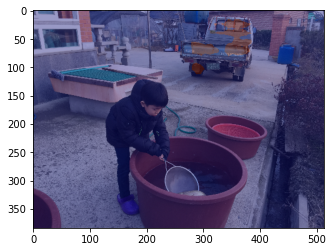

In [106]:
img_show = img_resized01.copy()
seg_map01 = np.where(seg_map01 == 7, 7, 0) # 예측 중 사람만 추출
img_mask = seg_map01 * (255/seg_map01.max()) # 255 normalization
img_mask = img_mask.astype(np.uint8)
color_mask = cv2.applyColorMap(img_mask, cv2.COLORMAP_JET)
img_show = cv2.addWeighted(img_show, 0.6, color_mask, 0.35, 0.0)

plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

자동차인데 차량으로 설정하였더니 부분만 인식하고 있다.

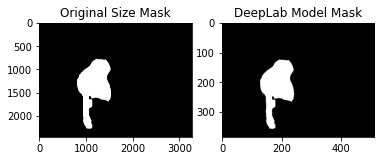

In [119]:
img_mask_up = cv2.resize(img_mask, img_orig.shape[:2][::-1], interpolation=cv2.INTER_LINEAR)
_, img_mask_up = cv2.threshold(img_mask_up, 128, 255, cv2.THRESH_BINARY)

ax = plt.subplot(1,2,1)
plt.imshow(img_mask_up, cmap=plt.cm.binary_r)
ax.set_title('Original Size Mask')

ax = plt.subplot(1,2,2)
plt.imshow(img_mask, cmap=plt.cm.binary_r)
ax.set_title('DeepLab Model Mask')

plt.show()

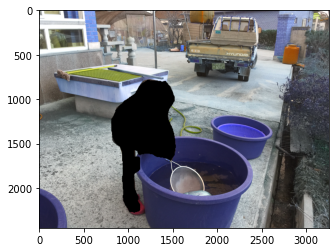

In [120]:
img_mask_color = cv2.cvtColor(img_mask_up, cv2.COLOR_GRAY2BGR)
img_bg_mask = cv2.bitwise_not(img_mask_color)
img_bg = cv2.bitwise_and(img_orig, img_bg_mask)
plt.imshow(img_bg)
plt.show()

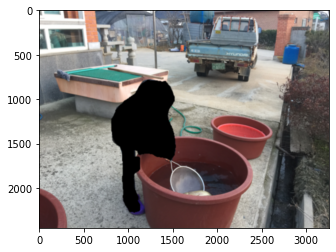

In [121]:
img_bg_blur = cv2.blur(img_bg, (13,13))
plt.imshow(cv2.cvtColor(img_bg_blur, cv2.COLOR_BGR2RGB))
plt.show()

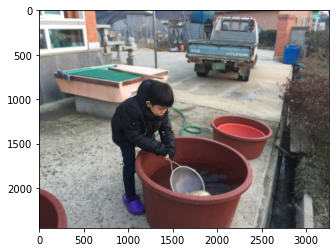

In [122]:
img_concat = np.where(img_mask_color==255, img_orig, img_bg_blur)
plt.imshow(cv2.cvtColor(img_concat, cv2.COLOR_BGR2RGB))
plt.show()

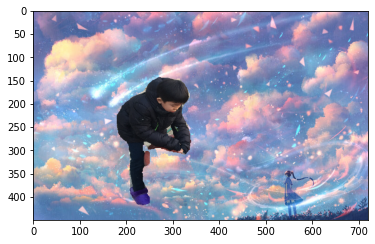

In [123]:
img_resized = cv2.resize(
    img_orig, (background_img_orig01.shape[1], background_img_orig01.shape[0]))
img_mask_resized = cv2.resize(
    img_mask_color, (background_img_orig01.shape[1], background_img_orig01.shape[0]))

img_background_concat = np.where(
    img_mask_resized == 255, img_resized, background_img_orig01)

plt.imshow(cv2.cvtColor(img_background_concat, cv2.COLOR_BGR2RGB))
plt.show()

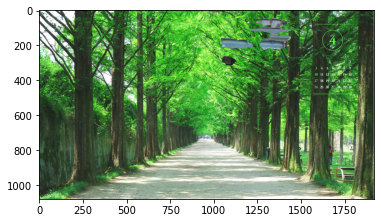

In [112]:
img_resized = cv2.resize(
    img_orig, (background_img_orig02.shape[1], background_img_orig02.shape[0]))
img_mask_resized = cv2.resize(
    img_mask_color, (background_img_orig02.shape[1], background_img_orig02.shape[0]))

img_background_concat = np.where(
    img_mask_resized == 255, img_resized, background_img_orig02)

plt.imshow(cv2.cvtColor(img_background_concat, cv2.COLOR_BGR2RGB))
plt.show()

# 두번째 이미지

In [50]:
img_resized03, img_seg_map03 = MODEL.run(img_orig02)
print (img_orig02.shape, img_resized03.shape, img_seg_map03.max())

(1280, 960, 3) (513, 384, 3) 15


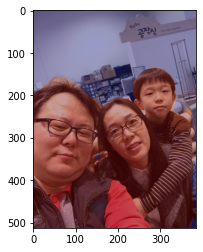

In [53]:
img_show03 = img_resized03.copy()
img_seg_map03 = np.where(img_seg_map03 == 15, 15, 0)
# img_mask03 = img_seg_map03 * (255/img_seg_map03.max()) # 255 normalization
img_mask = seg_map01 * (seg_map01.max()/255)

img_mask03 = img_mask03.astype(np.uint8)
color_mask03 = cv2.applyColorMap(img_mask03, cv2.COLORMAP_JET)
img_show03 = cv2.addWeighted(img_show03, 0.6, color_mask03, 0.35, 0.0)

plt.imshow(cv2.cvtColor(img_show03, cv2.COLOR_BGR2RGB))
plt.show()

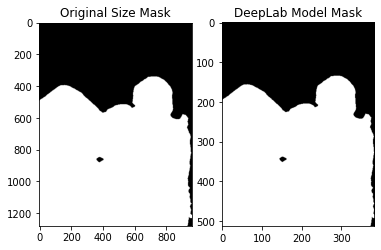

In [54]:
img_mask_up03 = cv2.resize(img_mask03, img_orig02.shape[:2][::-1], interpolation=cv2.INTER_LINEAR)
_, img_mask_up03 = cv2.threshold(img_mask_up03, 128, 255, cv2.THRESH_BINARY)

ax = plt.subplot(1,2,1)
plt.imshow(img_mask_up03, cmap=plt.cm.binary_r)
ax.set_title('Original Size Mask')

ax = plt.subplot(1,2,2)
plt.imshow(img_mask03, cmap=plt.cm.binary_r)
ax.set_title('DeepLab Model Mask')

plt.show()

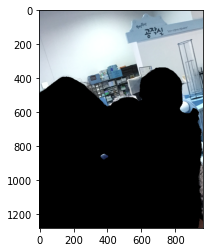

In [55]:
img_mask_color03 = cv2.cvtColor(img_mask_up03, cv2.COLOR_GRAY2BGR)
img_bg_mask03 = cv2.bitwise_not(img_mask_color03)
img_bg03 = cv2.bitwise_and(img_orig02, img_bg_mask03)
plt.imshow(img_bg03)
plt.show()

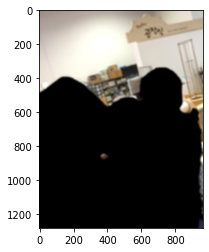

In [56]:
img_bg_blur03 = cv2.blur(img_bg03, (13,13))
plt.imshow(cv2.cvtColor(img_bg_blur03, cv2.COLOR_BGR2RGB))
plt.show()

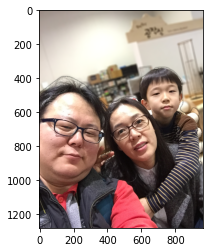

In [57]:
img_concat03 = np.where(img_mask_color03==255, img_orig02, img_bg_blur03)
plt.imshow(cv2.cvtColor(img_concat03, cv2.COLOR_BGR2RGB))
plt.show()

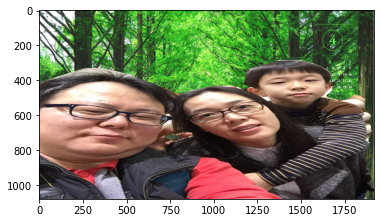

In [63]:
img_resized03 = cv2.resize(
    img_orig02, (background_img_orig02.shape[1], background_img_orig02.shape[0]))
img_mask_resized03 = cv2.resize(
    img_mask_color03, (background_img_orig02.shape[1], background_img_orig02.shape[0]))

img_background_concat03 = np.where(
    img_mask_resized03 == 255, img_resized03, background_img_orig02)

plt.imshow(cv2.cvtColor(img_background_concat03, cv2.COLOR_BGR2RGB))
plt.show()

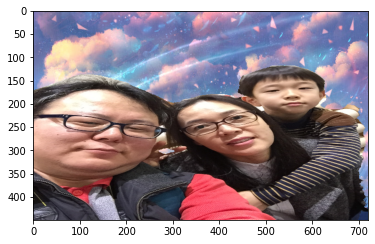

In [47]:
img_resized03 = cv2.resize(
    img_orig02, (background_img_orig01.shape[1], background_img_orig01.shape[0]))
img_mask_resized03 = cv2.resize(
    img_mask_color03, (background_img_orig01.shape[1], background_img_orig01.shape[0]))

img_background_concat03 = np.where(
    img_mask_resized03 == 255, img_resized03, background_img_orig01)

plt.imshow(cv2.cvtColor(img_background_concat03, cv2.COLOR_BGR2RGB))
plt.show()

회고 

1. 차량으로 인식해야 하는데 배로 인식하였다. 처음에는 차량으로 인식하였는 데 다시 실행하였더니 배로 인식하고 있었다.
2. 평상 같이 생긴 부분이 배로 부분만 인식하였다.
